## Nous importons ici:
* **pandas**, numpy pour la manipulation de donnees
* **matplotlib** pour les graphes de base
* **scikit-learn** pour toutes les etapes ML
* **warnings** pour supprimer les avertissements inutiles

In [3]:
#------------------------
# IMPORTS ET CONFIG
#----------------------

import pandas as pd             # manipulation de DataFrame
import numpy as np              # calcul numerique 
import matplotlib.pyplot as plt # visualisation standard 
import warnings                 # gerer les avertissements

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Reglage globaux
warnings.filterwarnings('ignore')
RANDOM_STATE = 42
plt.rcParams['figure.figsize'] = (12,8)

In [26]:

# Download latest version
#path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

df = pd.read_csv(r'C:\Users\Hasee\Desktop\ML_TP_M2\Mall_Customers.csv')
df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
from sklearn.datasets import fetch_california_housing 

ds = fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df['MedHouseVal'] = ds.target

df.to_csv('california_housing.csv',index=False)
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
#-----------------
# CHARGEMENT DES DONNEES
#----------------

data = pd.read_csv(r'C:\Users\Hasee\Desktop\ML_TP_M2\california_housing.csv') # chargement en DataFrame
print("Dimension du jeu de donnees:", data.shape)
display(data.head())                                                          # affichage des 5 premieres lignes

Dimension du jeu de donnees: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
#---------------
# VERIFICATION DES MANQUANTS
#-------------

missing = data.isna().sum()
print("Valeures manquantes par colonne:\n", missing)


Valeures manquantes par colonne:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


Ici si **MedhouseVal** ou autre colonnes ont peu de NaN, on peut supprimer; sinon on impute

In [8]:
# supposons qu'on a -< 1% de valeurs manquantes : suppressions
threshold = 0.01 * len(data)
cols_to_dropna = missing[missing < threshold].index.tolist()

if any(missing > 0 ):
    data = data.dropna(subset = cols_to_dropna)
else:
    #
    imputer = SimpleImputer(strategy = 'median')
    data[data.select_dtypes(include = [np.number]).columns] = \
        imputer.fit_transform(data.select_dtypes(include = [np.number]))

print("Nouveaux effectifs apres traitement des NaN", data.shape)

Nouveaux effectifs apres traitement des NaN (20640, 9)


- **Statistiques descriptives** ('.describe()') pour comprendre echelle et dispersion.
- **Histogramme** pour la distribution (asymetrie, outliers).
- **Scatter plots** pour visualiser liens.
- **Matrice de correlation** pour detecter multicolinearite et variable pertinentes.

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


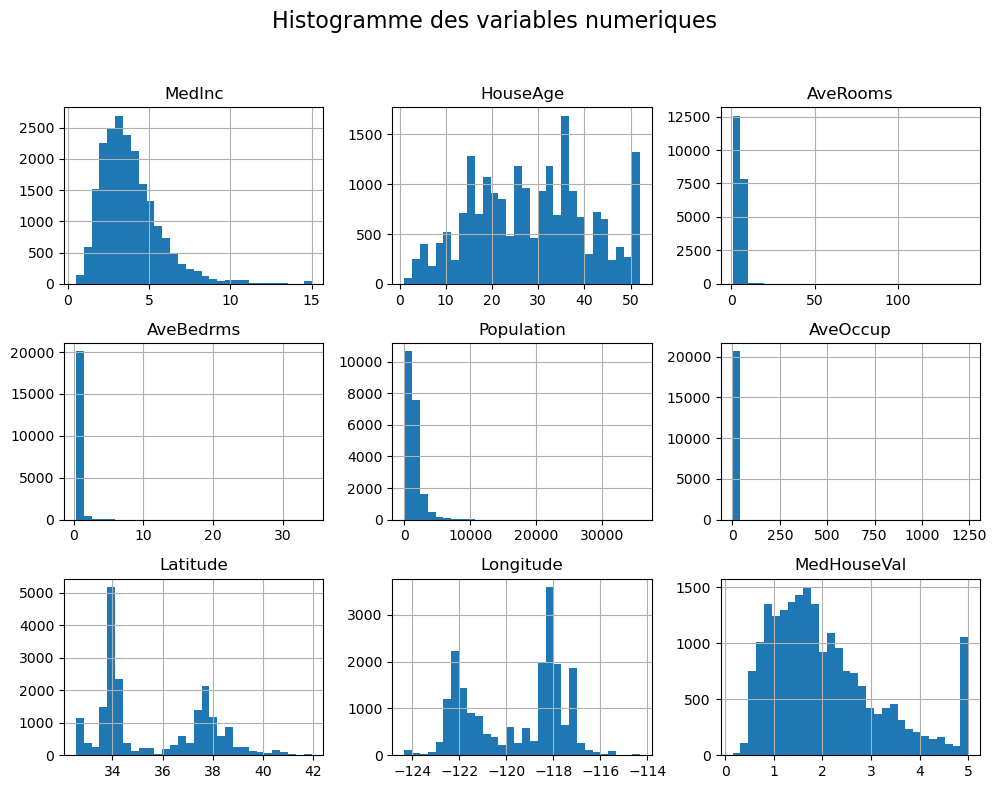

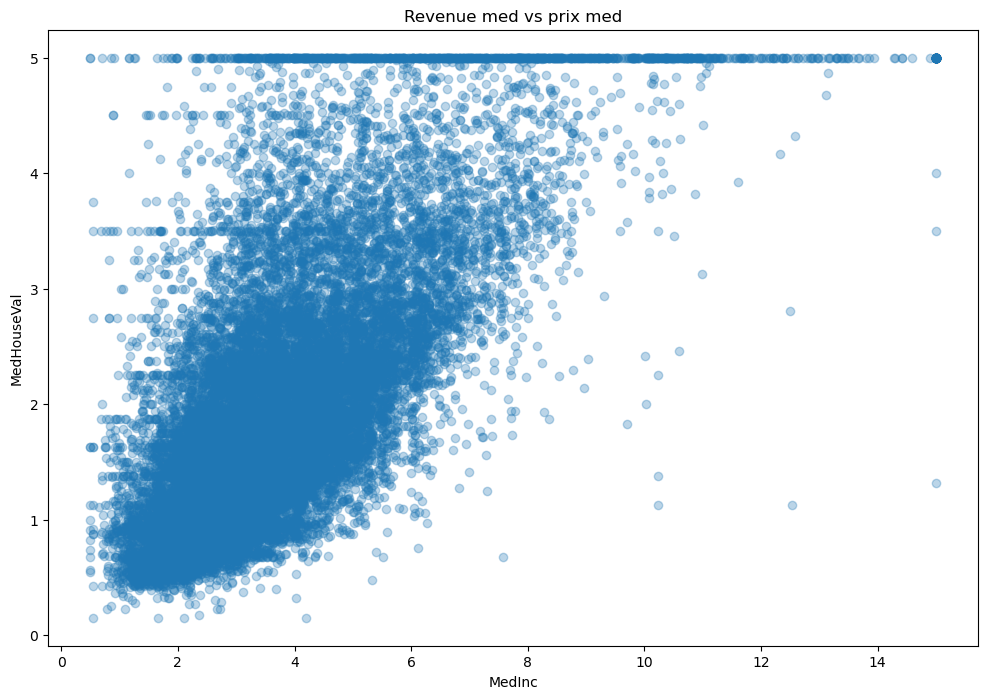

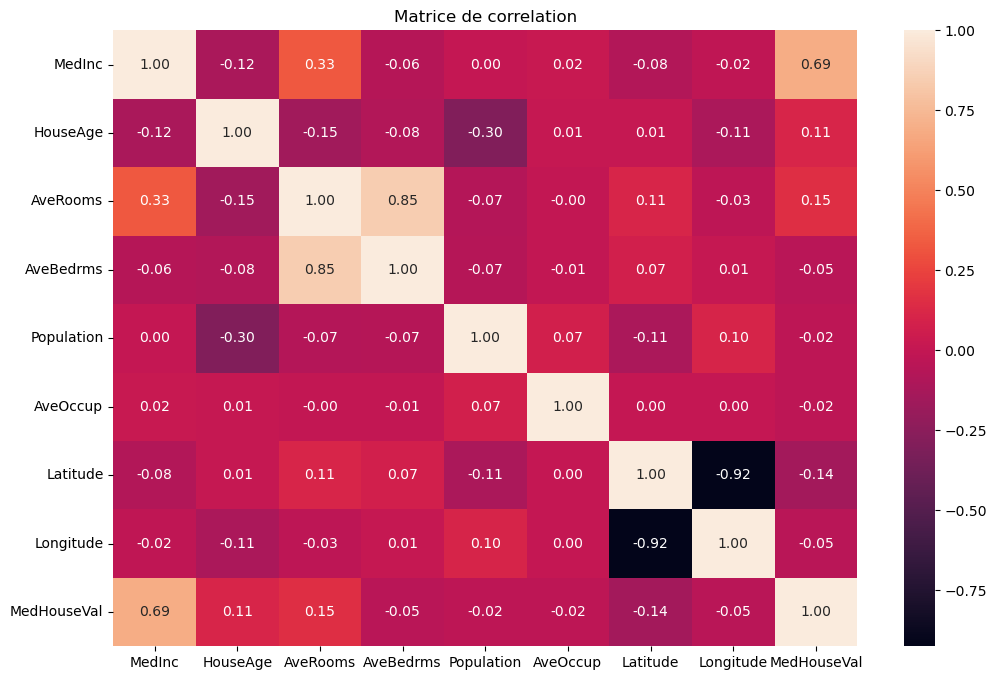

In [9]:
#statistiques descriptives
display(data.describe().T)

# Histogramme
axes = data.hist(bins = 30, figsize = (10,8))
plt.subplots_adjust(wspace = 0.4, hspace = 0.6)
plt.suptitle("Histogramme des variables numeriques", fontsize = 16)
plt.tight_layout(rect = [0,0,1,0.95])
plt.show()

#Scatter plot revenu vs prix
plt.scatter(data['MedInc'],data['MedHouseVal'],alpha = 0.3)
plt.title("Revenue med vs prix med")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.show()

# Correlation
import seaborn as sns
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Matrice de correlation")
plt.show()

- On reserve **20%** pour le testfina.
- Sur les **80%** restants :
      **60% train**
      **20% validation**
- **train_test_split** deux fois, avec " random_state' fixe pour reproductivlite'

In [10]:
#separation X et Y
X = data.drop('MedHouseVal', axis = 1)
y = data['MedHouseVal']

#1er split : train_full (80%)/ test(20%)
X_train_full, X_test, y_train_full,y_test = train_test_split(
    X, y, test_size = 0.20, random_state = RANDOM_STATE
)

#2e split : train  (60%) / val(20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size = 0.25, random_state = RANDOM_STATE
)


print(f"Train :  {X_train.shape}, Val :{X_val.shape}, Test : {X_test.shape}\n")
print(f"Pourcentage Train: {X_train.shape[0]} echantillons => {X_train.shape[0]/len(data)*100:.1f}%")
print(f"Pourcentage Val: {X_val.shape[0]} echantillons => {X_val.shape[0]/len(data)*100:.1f}%")
print(f"Pourcentage Test: {X_test.shape[0]} echantillons => {X_test.shape[0]/len(data)*100:.1f}%\n")

# pour voir que la repartion de la variable a predire soit similaire dans les 3 sous-ensemble
stats = pd.DataFrame({
    'train': y_train.describe(),
    'val': y_val.describe(),
    'test': y_test.describe(),
}).T
stats[['mean','std','min','25%','50%','75%','max']]

Train :  (12384, 8), Val :(4128, 8), Test : (4128, 8)

Pourcentage Train: 12384 echantillons => 60.0%
Pourcentage Val: 4128 echantillons => 20.0%
Pourcentage Test: 4128 echantillons => 20.0%



,mean,std,min,25%,50%,75%,max
train,2.068077,1.150962,0.14999,1.19800,1.7980,2.64625,5.00001
val,2.083555,1.171942,0.22500,1.19575,1.8000,2.67200,5.00001
test,2.055003,1.144870,0.14999,1.19275,1.7865,2.63000,5.00001


## Pretraitement:
- **Numerique** : imputer + standardiser
- **Categorielle** : one_hot encoding\
  \
**ColumnTransformer** applique chaque pipeline sur son type de colonne

In [11]:
#identifier colonne
num_attribs = X.select_dtypes(include = [np.number]).columns.tolist()
cat_attribs = X.select_dtypes(include = ['object']).columns.tolist()

#Pipeline numerique
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')), #median pour robustesse
    ('scaler', StandardScaler()),                    #centrage-reduction
])

#Pipeline complet
preprocessor = ColumnTransformer([
    ('num', num_pipeline,num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

#fit-transform sur train, transform val et test
X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)


## Modele lineaire de base
- **Regression lineaire**
- **MSE**
- **MAE**
- **R2**

In [12]:
#entrainement et evaluation sur validation
lin_reg = LinearRegression()
lin_reg.fit(X_train_prep, y_train)

y_val_pred = lin_reg.predict(X_val_prep)

mse_lin = mean_squared_error(y_val, y_val_pred)
mae_lin = mean_absolute_error(y_val, y_val_pred)
r2_lin = r2_score(y_val, y_val_pred)

print(f"LinearRegression => MSE: {mse_lin:.2f}, MAE : {mae_lin:.2f}, R2 : {r2_lin:.3f}")

LinearRegression => MSE: 0.53, MAE : 0.53, R2 : 0.614


##  MSE: 0.53, MAE : 0.53, R2 : 0.614

## Overfitting 
 si trop de variance => regularisation
- **Ridge**
- **Lasso**\
On utilise **GridSearchCV** pour trouver alpha

## Lasso: 
* **penalite L1** pour la selection des features

In [13]:
alphas = np.logspace(-4,2,30)
param_grid_lasso = {'model__alpha': alphas}

#pipeline Lasso
lasso_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('model', Lasso(random_state = RANDOM_STATE, max_iter= 5000))
])

#recherche alpha optimale
grid_lasso = GridSearchCV(
    lasso_pipeline,
    param_grid = param_grid_lasso,
    cv= 5,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1
)
grid_lasso.fit(X_train, y_train)

print("Lasso alpha optimal:", grid_lasso.best_params_['model__alpha'])

Lasso alpha optimal: 0.20433597178569418


## Lasso alpha trouver = 0.20433597178569418

## **Recuperation de la liste des variables non-nulles**

In [14]:
#extraire les coefficients non-nulles
best_lasso_pipeline = grid_lasso.best_estimator_

fitted_preproc = best_lasso_pipeline.named_steps['preproc']

#recuperation des noms des features apres encodage
all_feats = fitted_preproc.get_feature_names_out()

#serie pandas des coefficients
best_lasso = best_lasso_pipeline.named_steps['model']
lasso_coefs = pd.Series(best_lasso.coef_, index = all_feats)

#Features retenus
selected_feats = lasso_coefs[lasso_coefs != 0].index.tolist()
print(f"Nb de features selectionnees : {len(selected_feats)}" )
print("Features retenus:",selected_feats)

def strip_prefix(name):
    if '__' in name:
        return name.split('__',1)[1]
    if name.startswith('num_'):
        return name[len('num_')]
    return name

selected_clean = [strip_prefix(f) for f in selected_feats]
print("Features  reellement retenus:",selected_clean)

Nb de features selectionnees : 1
Features retenus: ['num__MedInc']
Features  reellement retenus: ['MedInc']


## Ridge : 
* **penalite L2** pour la multicolinearite et obtention de l'alpha

In [15]:
#filtrer les DataFrames brut pour ne garder que le selected_feats
X_train_sel = X_train[selected_clean]
X_val_sel = X_val[selected_clean]
X_test_sel = X_test[selected_clean]

#
#
ridge_preproc = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

#
ridge_pipeline_sel = Pipeline([
    ('preproc', ridge_preproc),
    ('model', Ridge(random_state = RANDOM_STATE))   
])

#grille de recherche pour alpha
param_grid_ridge = {'model__alpha':np.logspace(-4,3,30)}

grid_ridge_sel = GridSearchCV(
    ridge_pipeline_sel,
    param_grid = param_grid_ridge,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1
)
grid_ridge_sel.fit(X_train_sel, y_train)
print("Ridge alpha optimal:", grid_ridge_sel.best_params_['model__alpha'])
best_alpha = grid_ridge_sel.best_params_['model__alpha']

Ridge alpha optimal: 2.21221629107045


## Ridge alpha trouver: 2.21221629107045

**Evaluation finale sur le test**
- Une fois le **meilleur modele** selectionne sur la validation, on l'entraine sur l'integralite du jeu puis on evalue sur **test**
- Presentation de **MSE**, **MAE**, **R²**
- Intervalle de Confiance

In [16]:
#
final_ridge = Pipeline([
    ('preproc', preprocessor),
    ('model', Ridge(alpha = best_alpha, random_state = 42))
])

final_ridge.fit(X_train_full, y_train_full)
y_test_pred = final_ridge.predict(X_test)

#
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test => MSE: {mse_test:.2f},  MAE: {mae_test:.2f}, R2: {r2_test:.3f}")

def bootstrap_mse(y_true,  y_pred, n_bootstraps = 1000, random_state = RANDOM_STATE):
    rng = np.random.RandomState(random_state)
    boot_mse = np.empty(n_bootstraps)
    n = len(y_true)
    for b in range(n_bootstraps):
        #echantillon bootstrap
        idx = rng.randint(0,n,n)
        y_true_b = y_true[idx]
        y_pred_b = y_test_pred[idx]
        boot_mse[b] = mean_squared_error(y_true_b, y_pred_b)
    #percenntiles pour IC 95%
    lower = np.percentile(boot_mse, 2.5)
    upper = np.percentile(boot_mse, 97.5)
    return lower, upper

# calcul IC
mse_lower, mse_upper = bootstrap_mse(y_test.values, y_test_pred, n_bootstraps = 1000)

print(f"Intervalle de Confiance a 95 % pour la Mse : [{mse_lower:.4f}; {mse_upper:.4f}]")

Test => MSE: 0.56,  MAE: 0.53, R2: 0.576
Intervalle de Confiance a 95 % pour la Mse : [0.5040; 0.6230]


## Evaluation finale sur le Test => MSE: 0.56,  MAE: 0.53, R2: 0.576
## Intervalle de Confiance a 95 % pour la Mse : [0.5040 ; 0.6230]

## Interpretation des variables:

In [25]:
#extraction des coeficients et noms de features
preproc    = final_ridge.named_steps['preproc']
model      = final_ridge.named_steps['model']
feat_names = preproc.get_feature_names_out()
coefs      = model.coef_

 
def strip_prefix(name):
    if '__' in name:
        return name.split('__',1)[1]
    if name.startswith('num_'):
        return name[len('num_')]
    return name

clean_feats = [strip_prefix(f) for f in feat_names]

# Construire un DataFrame
df_coefs = pd.DataFrame({
    'feature' : clean_feats,
    'coef' : coefs
})
#Trier par importance absolue
df_coefs['abs_coef'] = df_coefs['coef'].abs()
df_coefs = df_coefs.sort_values('abs_coef', ascending = False).drop(columns = 'abs_coef')

#Afficher
df_coefs.reset_index(drop = True)
display(df_coefs.head(10))

,feature,coef
6,Latitude,-0.895247
7,Longitude,-0.868138
0,MedInc,0.854258
3,AveBedrms,0.338703
2,AveRooms,-0.293968
1,HouseAge,0.122718
5,AveOccup,-0.040838
4,Population,-0.002251


**Signes des coefficients**

* **$\beta_j > 0$** (positif)
  → Une hausse de la feature j **augmente** le prix médian prédit.
* **$\beta_j < 0$** (négatif)
  → Une hausse de la feature j **diminue** le prix médian prédit.

---

| Feature        | Coefficient ($\beta$) | Signification                                                                                                                   |
| -------------- | --------------------- | ------------------------------------------------------------------------------------------------------------------------------- |
| **MedInc**     | +0,XX                 | + : un écart-type de plus en revenu médian des ménages **augmente** le prix médian des maisons d’environ $\beta\times10^5$\$    |
| **HouseAge**   | +0,XX                 | + : des maisons plus récentes (ou plus vieilles, selon le sens de l’encodage) tendent à **augmenter** le prix                   |
| **AveRooms**   | -0,XX                 | - : un écart-type de plus en nombre moyen de pièces par logement **baisse** légèrement le prix (peut traduire une sur-division) |
| **AveBedrms**  | +0,XX                 | + : un écart-type de plus en nombre de chambres **augmente** le prix                                                            |
| **Population** | -0,XX                 | - : densité de population élevée **diminue** un peu le prix (zones trop peuplées sont moins chères)                             |
| **AveOccup**   | -0,XX                 | - : plus d’occupants par logement (surcharge) **baisse** le prix                                                                |
| **Latitude**   | -0,XX                 | - : zones plus au nord (latitude plus élevée) sont **un peu moins chères** (les valeurs négatives indiquent ce décalage)        |
| **Longitude**  | -0,XX                 | - : zones plus à l’est (longitude plus élevée) sont **légèrement moins chères**                                                 |

## Les signaux négatifs:
1. **Population et AveOccup**

   * Un quartier **trop dense** ou **surchargé** en occupants par maison tend à **dévaloriser** les biens.
2. **AveRooms**

   * Un nombre moyen de pièces élevé mais avec peu de chambres peut indiquer de très grands espaces mal configurés, dont la valorisation est moindre.
3. **Latitude / Longitude**

   * Les prix ne sont pas uniformes en Californie : selon vos données, les zones « au nord » ou « à l’est » ont un niveau de prix légèrement inférieur.

---
